In [7]:
import pandas as pd
import numpy as np

from sklearn.manifold import TSNE

from google.cloud import aiplatform

aiplatform.init(
    project='vidio-quiz-prod',
    location='asia-southeast1',
    staging_bucket='gs://genai_hackathon_2024',
)
model = aiplatform.Endpoint("7738653107357220864")

def embedding_text(model, text, task_type="DEFAULT"):
    prediction = model.predict(instances=[{
        "content": text,
        "task_type": task_type,
        "title": ""
    }])
    for embedding in prediction.predictions:
        vector = embedding
    return vector

In [8]:
film_df = pd.read_json('data/film_metadata_tuned.json', lines=True)

In [ ]:
film_df[film_df[]]

In [9]:
film_df['label'] = film_df['title'].apply(lambda x: x if x == 'ratu adil' else '')
film_df = film_df._append({"label": 'query dian sastrowardoyo', "search_text": "dian sastrowardoyo", "embedding": embedding_text(model, "dian sastrowardoyo", "RETRIEVAL_QUERY")}, ignore_index=True)
film_df = film_df._append({"label": 'query dian sastro', "search_text": "dian sastro", "embedding": embedding_text(model, "dian sastro", "RETRIEVAL_QUERY")}, ignore_index=True)
film_df = film_df._append({"label": 'query actors dian sastro', "search_text": "dian sastro", "embedding": embedding_text(model, "actors: dian sastro", "RETRIEVAL_QUERY")}, ignore_index=True)
film_df = film_df._append({"label": 'query ratu adil', "search_text": "ratu adil", "embedding": embedding_text(model, "ratu adil", "RETRIEVAL_QUERY")}, ignore_index=True)
film_df = film_df._append({"label": 'query actors ratu adil', "search_text": "abdurrahman arif, andri mashadi, budi ros, dian sastrowardoyo, donny damara, hana malasan, ira wibowo, khiva iskak, muhammad khan, nino fernandez", "embedding": embedding_text(model, "abdurrahman arif, andri mashadi, budi ros, dian sastrowardoyo, donny damara, hana malasan, ira wibowo, khiva iskak, muhammad khan, nino fernandez", "RETRIEVAL_QUERY")}, ignore_index=True)

In [10]:
film_df.sample()

,id,description,release_date,total_watchers,age_rating,image_portrait,content_url,image_url,title,group_l1,group_l2,genres,actors,directors,country,release_year,popularity,search_text,embedding,label
5433,2543.0,Aksa yang baru saja putus dari Kayla mencoba u...,2021-03-17,6.0,13 or more,kosong-665db4.jpg,https://www.vidio.com/premier/2543,https://thumbor.prod.vidiocdn.com/vg8NokBNFfmI...,kosong,series,indonesia,"drama, romance","erinda chairani, haviza devi anjani, kevin zuf...",rendy herpy,indonesia,2021,below average,title: kosong\ndescription: Aksa yang baru saj...,"[0.0006612522, -0.0023698139, -0.0109245889, 0...",


In [11]:
X = np.array(film_df['embedding'].to_list(), dtype=np.float32)
X.shape

(5776, 768)

In [12]:
tsne = TSNE(random_state=0, n_iter=1000)
tsne_results = tsne.fit_transform(X)

In [13]:
df_tsne = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
df_tsne['title'] = film_df['title']
df_tsne['id'] = film_df['id']
df_tsne['popularity'] = film_df['popularity']
df_tsne['age_rating'] = film_df['age_rating']
df_tsne['group_l1'] = film_df['group_l1']
df_tsne['group_l2'] = film_df['group_l2']
df_tsne['label'] = film_df['label']
df_tsne

,TSNE1,TSNE2,title,id,popularity,age_rating,group_l1,group_l2,label
0,4.941320,7.859830,ratu adil,9372.0,trending,18 or more,series,vidio original,ratu adil
1,4.167631,7.190177,cinta pertama ayah,9456.0,trending,18 or more,series,vidio original,
2,-2.813123,-9.342589,bidadari surgamu,7617.0,trending,13 or more,series,tv sinetron,
3,-9.876406,-40.162762,magic 5,7576.0,trending,13 or more,series,tv sinetron,
4,-1.983043,-4.230640,tertawan hati,9535.0,trending,13 or more,series,tv sinetron,
...,...,...,...,...,...,...,...,...,...
5771,-23.421183,-44.260845,NaN,NaN,NaN,NaN,NaN,NaN,query dian sastrowardoyo
5772,-23.418955,-44.264526,NaN,NaN,NaN,NaN,NaN,NaN,query dian sastro
5773,-23.417788,-44.266727,NaN,NaN,NaN,NaN,NaN,NaN,query actors dian sastro
5774,5.344238,7.714341,NaN,NaN,NaN,NaN,NaN,NaN,query ratu adil


In [14]:
df_tsne[df_tsne['label'] != '']

,TSNE1,TSNE2,title,id,popularity,age_rating,group_l1,group_l2,label
0,4.941320,7.859830,ratu adil,9372.0,trending,18 or more,series,vidio original,ratu adil
5771,-23.421183,-44.260845,NaN,NaN,NaN,NaN,NaN,NaN,query dian sastrowardoyo
5772,-23.418955,-44.264526,NaN,NaN,NaN,NaN,NaN,NaN,query dian sastro
5773,-23.417788,-44.266727,NaN,NaN,NaN,NaN,NaN,NaN,query actors dian sastro
5774,5.344238,7.714341,NaN,NaN,NaN,NaN,NaN,NaN,query ratu adil
5775,-4.454201,-23.450699,NaN,NaN,NaN,NaN,NaN,NaN,query actors ratu adil


(-67.15995578765869, 82.01029376983642, -73.68478279113769, 72.68102149963379)

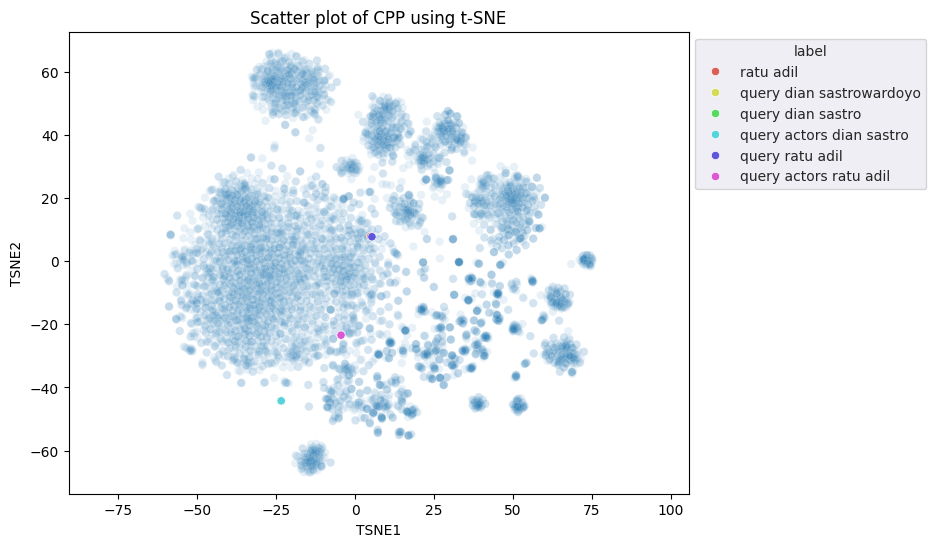

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,6)) # Set figsize
sns.set_style('darkgrid', {"grid.color": ".6", "grid.linestyle": ":"})
sns.scatterplot(data=df_tsne[df_tsne['label'] == ""], x='TSNE1', y='TSNE2', hue="label", alpha=0.1)
sns.scatterplot(data=df_tsne[df_tsne['label'] != ""], x='TSNE1', y='TSNE2', hue="label", palette='hls')
# sns.scatterplot(data=df_tsne[df_tsne['group_l2'] != "vidio original"], x='TSNE1', y='TSNE2', hue="group_l2", alpha=0.1)
# sns.scatterplot(data=df_tsne[df_tsne['group_l2'] == "vidio original"], x='TSNE1', y='TSNE2', hue="group_l2", palette='hls')
# sns.scatterplot(data=df_tsne[df_tsne['popularity'] == "trending"], x='TSNE1', y='TSNE2', hue="popularity")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Scatter plot of CPP using t-SNE');
plt.xlabel('TSNE1');
plt.ylabel('TSNE2');
plt.axis('equal')